### Preparing the input_dataframe for training the clustering model
- prepared_purchased_history is loaded using pandas
- As we need to cluster based on columns(items) we **transpose** the matrix
- Apply Kmeans clustering algorithm

### Defining a kmeans clusteirng model

In [5]:
from sklearn.cluster import KMeans
import pandas as pd

def fit_kmeans(df, n):
    kmeans = KMeans(n_clusters = n, random_state = 0)
    kmeans.fit(df)
    return kmeans

**As we don't know the number of clusters to be considered initially(as clustering being Unsupervised learning algorithm) we loop the model and find the error in each trail. But as the number of clusters increases we might overfit, so restrict the number of clusters at the elbow point**

In [3]:
loaded_df = pd.read_csv('../Data/prepared_purchased_history.csv')
loaded_df= loaded_df.drop(['id'], axis=1)
transposed_matrix = loaded_df.T

MSD_dict = {}
for n in range(2,48):
    MSD_dict[n] = fit_kmeans(transposed_matrix,n).inertia_/len(transposed_matrix)
print (MSD_dict)

{2: 5144.253682170543, 3: 4981.582589285715, 4: 4844.010981912145, 5: 4513.574857026143, 6: 4366.020202020202, 7: 4319.411739864867, 8: 3915.578973765431, 9: 3922.595269097221, 10: 3816.9902510683746, 11: 3585.307531130266, 12: 3503.8214962121215, 13: 3379.159722222224, 14: 3184.958055555555, 15: 3064.5566123188414, 16: 3015.0937500000014, 17: 2846.94816468254, 18: 2681.5880681818176, 19: 2561.7306547619046, 20: 2435.475694444445, 21: 2306.529513888889, 22: 2183.914999999999, 23: 2088.759548611111, 24: 1974.3766666666663, 25: 1854.727430555555, 26: 1744.3958333333333, 27: 1649.7215909090908, 28: 1526.3849206349212, 29: 1418.239583333334, 30: 1321.4254385964916, 31: 1221.3229166666663, 32: 1097.1004901960787, 33: 1002.875, 34: 906.5472222222223, 35: 822.2263257575755, 36: 694.7852564102564, 37: 624.1979166666669, 38: 547.5895833333334, 39: 489.7770833333334, 40: 428.0364583333333, 41: 370.7552083333333, 42: 314.12326388888886, 43: 257.2552083333333, 44: 201.52604166666666, 45: 146.15104

### Plotting the Error (vs) No. of Clusters

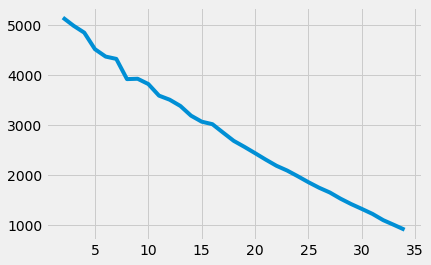

In [109]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

plt.plot(list(MSD_dict.keys()), list(MSD_dict.values()))

As we have not found a particular elbow point in this case consider the number of clusters to be 12 and let's check out the items that goes into each cluster. Then merge the dataframe with item_to_id dataframe to visulaize across the items names.

In [26]:
kmeans = fit_kmeans(transposed_matrix, 12)

cluster_map = pd.DataFrame()
cluster_map['Item_id'] = transposed_matrix.index.values
cluster_map['cluster_no'] = kmeans.labels_
cluster_map

,Item_id,cluster_no
0,item_1,8
1,item_2,9
2,item_3,7
3,item_4,8
4,item_5,8
5,item_6,6
6,item_7,1
7,item_8,8
8,item_9,3
9,item_10,2


*Loading the item_to_id csv and modifying cluster_dataframe as well to merge 2 dataframes*

In [27]:
items_df = pd.read_csv('../Data/item_to_id.csv')
cluster_map['Item_id'] =  cluster_map['Item_id'].apply(lambda x: int(x.split("_")[-1]))

final_output_df = pd.merge(cluster_map, items_df, on='Item_id')
final_output_df = final_output_df.sort_values(['cluster_no'], ascending=True)
final_output_df = final_output_df.reset_index(drop=True)
final_output_df

,Item_id,cluster_no,Item_name
0,36,0,ice cream
1,24,1,paper towels
2,7,1,sandwich bags
3,33,1,toilet paper
4,15,1,aluminum foil
5,45,2,cauliflower
6,42,2,cucumbers
7,10,2,carrots
8,23,3,tea
9,43,3,coffee


In [28]:
final_output_df.to_csv('../Data/clustered_dataframe.csv',index=False)